In [7]:
# Load the data
df <- read.csv("USA_Stories.csv")

In [8]:
# Take a look at the first few rows of the dataset to understand its structure
View(df)

Film,Genre,Lead.Studio,Audience..score..,Profitability,Rotten.Tomatoes..,Worldwide.Gross,Year
<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<int>
27 Dresses,Comedy,Fox,71,5.3436218,40,160.308654,2008
(500) Days of Summer,Comedy,Fox,81,8.0960000,87,60.720000,2009
A Dangerous Method,Drama,Independent,89,0.4486447,79,8.972895,2011
A Serious Man,Drama,Universal,64,4.3828571,89,30.680000,2009
Across the Universe,Romance,Independent,84,0.6526032,54,29.367143,2007
Beginners,Comedy,Independent,80,4.4718750,84,14.310000,2011
Dear John,Drama,Sony,66,4.5988000,29,114.970000,2010
Enchanted,Comedy,Disney,80,4.0057371,93,340.487652,2007
Fireproof,Drama,Independent,51,66.9340000,40,33.467000,2008


In [9]:
# Load necessary libraries
install.packages("tidyverse")  # If tidyverse isn't installed yet
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# Check data types of each column to understand the structure of the dataset
str(df)

# Check for missing values in the dataset
colSums(is.na(df))

# Drop rows with missing values to clean the dataset
df <- na.omit(df)

# Verify that missing values have been removed
colSums(is.na(df))

'data.frame':	74 obs. of  8 variables:
 $ Film             : chr  "27 Dresses" "(500) Days of Summer" "A Dangerous Method" "A Serious Man" ...
 $ Genre            : chr  "Comedy" "Comedy" "Drama" "Drama" ...
 $ Lead.Studio      : chr  "Fox" "Fox" "Independent" "Universal" ...
 $ Audience..score..: int  71 81 89 64 84 80 66 80 51 52 ...
 $ Profitability    : num  5.344 8.096 0.449 4.383 0.653 ...
 $ Rotten.Tomatoes..: int  40 87 79 89 54 84 29 93 40 26 ...
 $ Worldwide.Gross  : num  160.31 60.72 8.97 30.68 29.37 ...
 $ Year             : int  2008 2009 2011 2009 2007 2011 2010 2007 2008 2008 ...


Film             Genre       Lead.Studio Audience..score.. 
                0                 0                 0                 1 
    Profitability Rotten.Tomatoes..   Worldwide.Gross              Year 
                3                 1                 0                 0

Film             Genre       Lead.Studio Audience..score.. 
                0                 0                 0                 0 
    Profitability Rotten.Tomatoes..   Worldwide.Gross              Year 
                0                 0                 0                 0

In [11]:
# Check for duplicates in the dataset (rows with duplicate 'Film' names)
dim(df[duplicated(df$Film),])[1]

# Round numeric columns to 2 decimal places for easier readability
df$Profitability <- round(df$Profitability, digits = 2)
df$Worldwide.Gross <- round(df$Worldwide.Gross, digits = 2)

[1] 0

In [12]:
# View the updated dimensions of the dataset
dim(df)

[1] 70  8

In [13]:
# Load ggplot2 for data visualization (boxplot and scatterplot)
install.packages("ggplot2")  # If ggplot2 isn't installed yet
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


[1] 65  8

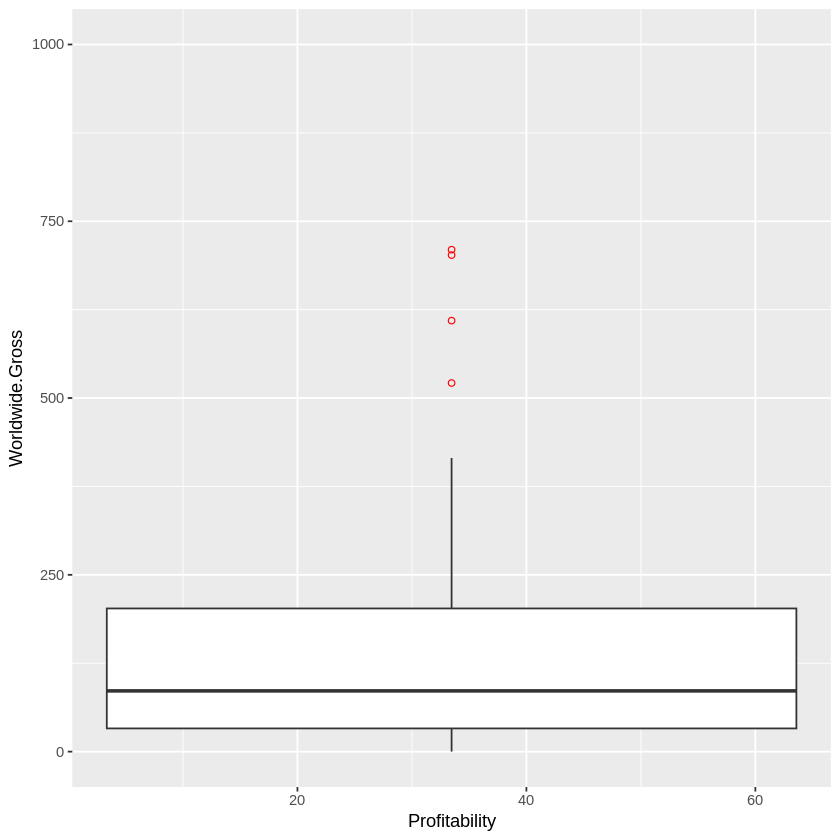

In [14]:
# ------------------------------
# OUTLIER DETECTION AND REMOVAL
# ------------------------------

# Visualize outliers using a boxplot for Profitability vs Worldwide Gross
ggplot(df, aes(x = Profitability, y = Worldwide.Gross)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 1) +  # Highlight outliers in red
  scale_x_continuous(labels = scales::comma) +  # Format x-axis with commas
  coord_cartesian(ylim = c(0, 1000))  # Set y-axis limit for better visibility

# Remove outliers in 'Profitability' column using IQR (Interquartile Range)
Q1 <- quantile(df$Profitability, 0.25)
Q3 <- quantile(df$Profitability, 0.75)
IQR <- IQR(df$Profitability)
no_outliers <- subset(df, df$Profitability > (Q1 - 1.5 * IQR) & df$Profitability < (Q3 + 1.5 * IQR))

# Check dimensions after removing 'Profitability' outliers
dim(no_outliers)

In [15]:
# Remove outliers in 'Worldwide.Gross' column using IQR
Q1 <- quantile(no_outliers$Worldwide.Gross, 0.25)
Q3 <- quantile(no_outliers$Worldwide.Gross, 0.75)
IQR <- IQR(no_outliers$Worldwide.Gross)
df1 <- subset(no_outliers, no_outliers$Worldwide.Gross > (Q1 - 1.5 * IQR) & no_outliers$Worldwide.Gross < (Q3 + 1.5 * IQR))

# Check dimensions after removing 'Worldwide.Gross' outliers
dim(df1)

[1] 61  8

     Film              Genre           Lead.Studio        Audience..score..
 Length:61          Length:61          Length:61          Min.   :35.00    
 Class :character   Class :character   Class :character   1st Qu.:52.00    
 Mode  :character   Mode  :character   Mode  :character   Median :62.00    
                                                          Mean   :63.02    
                                                          3rd Qu.:72.00    
                                                          Max.   :89.00    
 Profitability   Rotten.Tomatoes.. Worldwide.Gross       Year     
 Min.   :0.000   Min.   : 3.0      Min.   :  0.03   Min.   :2007  
 1st Qu.:1.750   1st Qu.:27.0      1st Qu.: 32.40   1st Qu.:2008  
 Median :2.530   Median :43.0      Median : 69.31   Median :2009  
 Mean   :3.014   Mean   :46.7      Mean   :103.16   Mean   :2009  
 3rd Qu.:3.750   3rd Qu.:64.0      3rd Qu.:153.09   3rd Qu.:2010  
 Max.   :8.740   Max.   :93.0      Max.   :355.08   Max.   :2011  

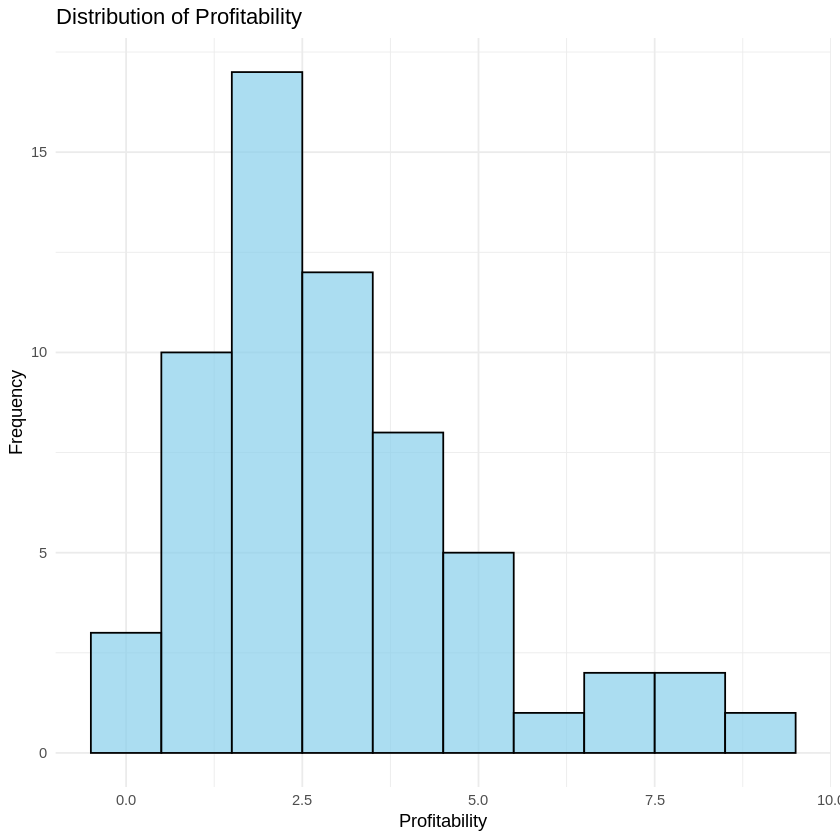

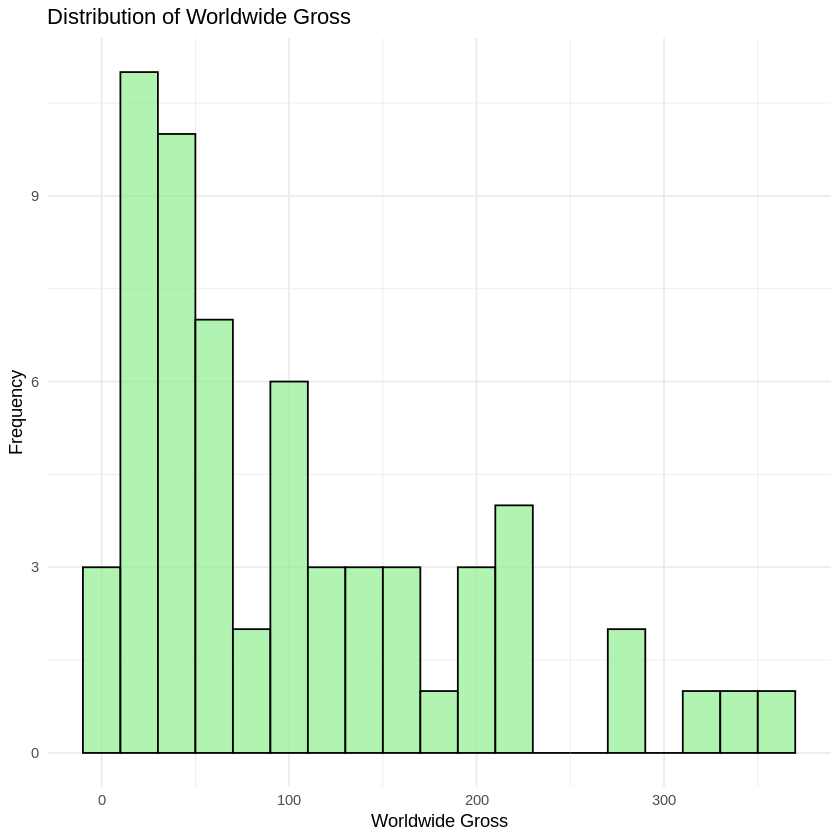

In [16]:
# ------------------------------
# EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------

# Summary Statistics/Univariate Analysis
summary(df1)

# Visualizing distribution of 'Profitability' (Histogram)
ggplot(df1, aes(x = Profitability)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Profitability", x = "Profitability", y = "Frequency") +
  theme_minimal()

# Visualizing distribution of 'Worldwide.Gross' (Histogram)
ggplot(df1, aes(x = Worldwide.Gross)) +
  geom_histogram(binwidth = 20, fill = "lightgreen", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Worldwide Gross", x = "Worldwide Gross", y = "Frequency") +
  scale_x_continuous(labels = scales::comma) +  # Format x-axis with commas
  theme_minimal()

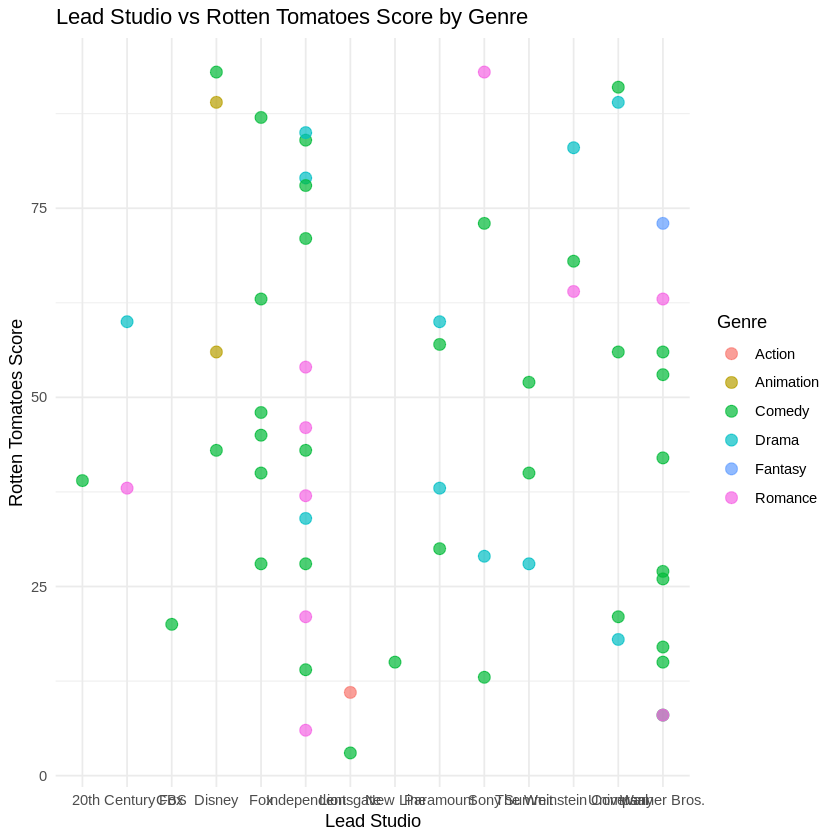

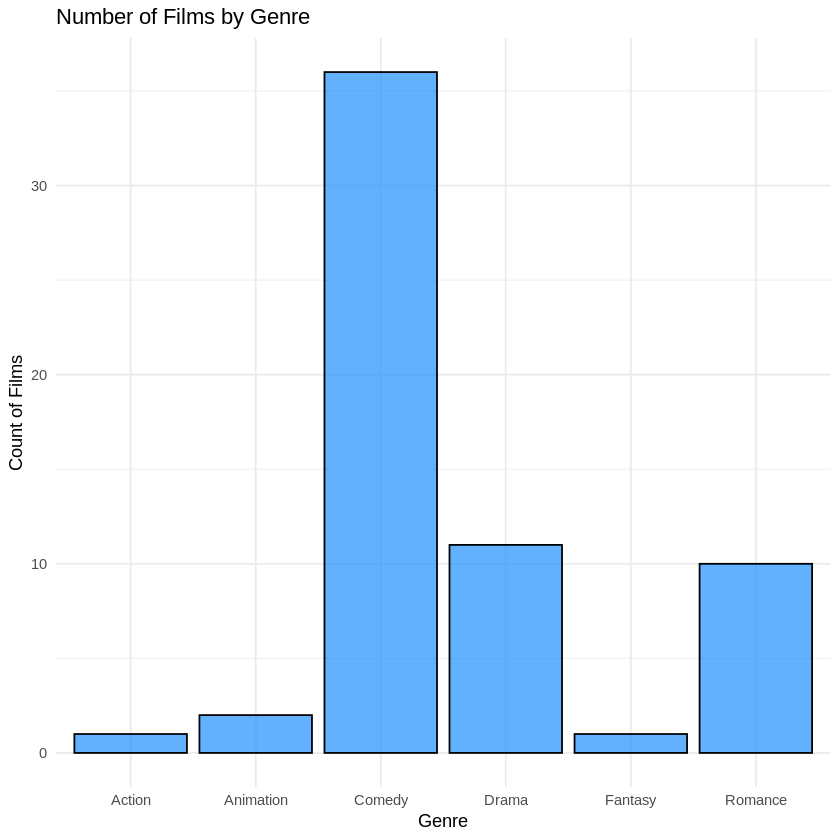

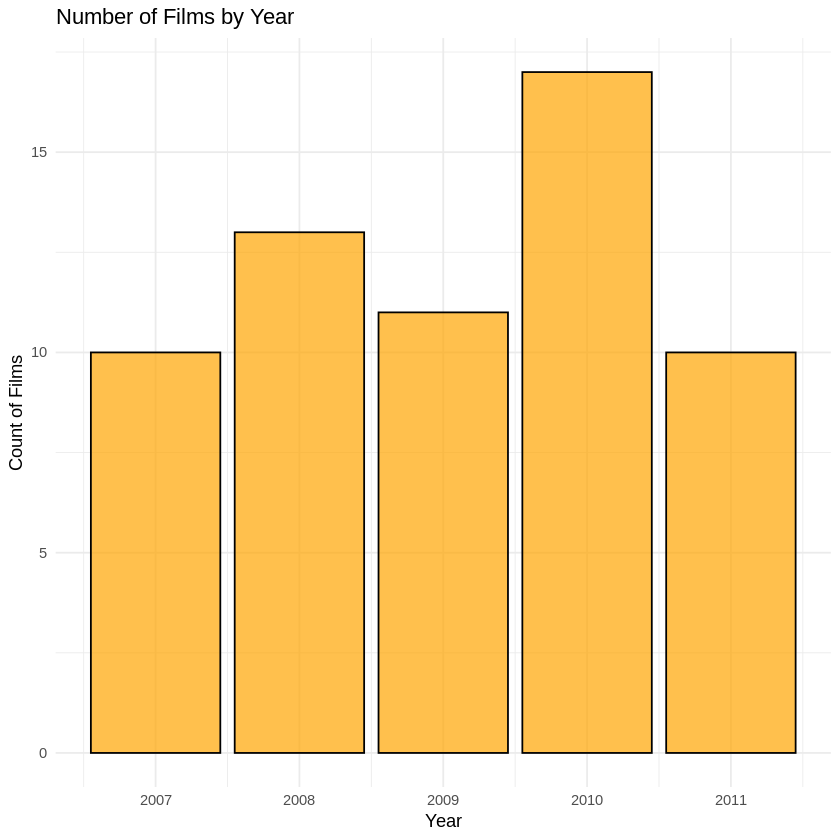

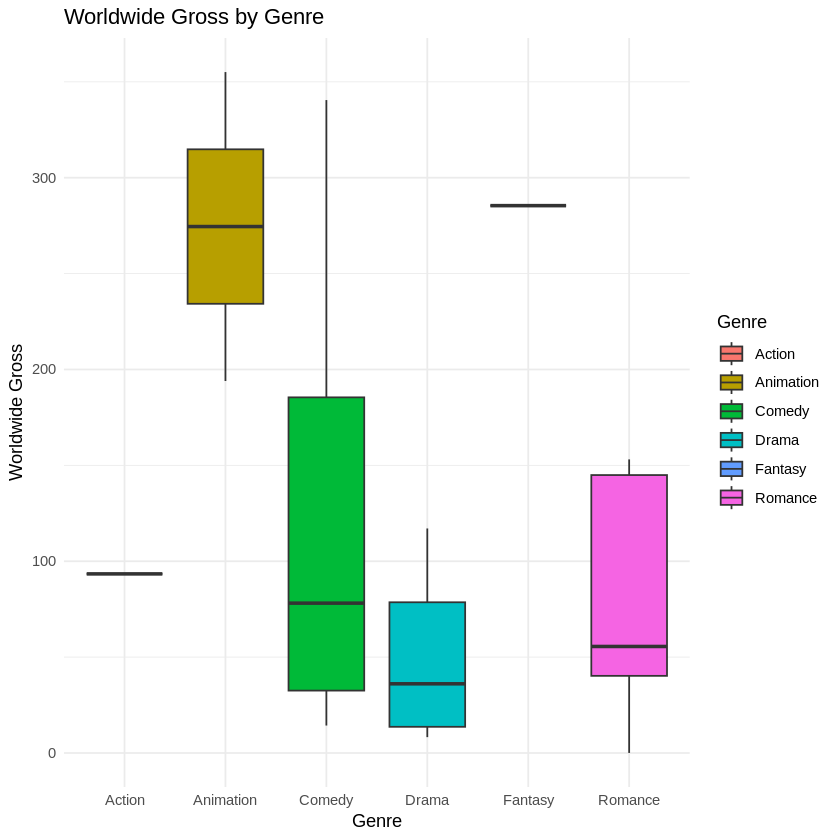

In [17]:
# ------------------------------
# BIVARIATE ANALYSIS
# ------------------------------

# Scatterplot: Lead Studio vs Rotten Tomatoes (with color based on 'Genre')
ggplot(df1, aes(x = Lead.Studio, y = Rotten.Tomatoes.., color = Genre)) +
  geom_point(size = 3, alpha = 0.7) +  # Scatterplot points with color by genre
  labs(title = "Lead Studio vs Rotten Tomatoes Score by Genre",
       x = "Lead Studio", y = "Rotten Tomatoes Score") +
  scale_y_continuous(labels = scales::comma) +  # Format y-axis with commas
  theme(axis.text.x = element_text(angle = 90)) +  # Rotate x-axis labels for better readability
  theme_minimal()

# Bar chart: Count of films by genre
ggplot(df1, aes(x = Genre)) +
  geom_bar(fill = "dodgerblue", color = "black", alpha = 0.7) +
  labs(title = "Number of Films by Genre", x = "Genre", y = "Count of Films") +
  theme_minimal()

# Bar chart: Count of films by Year (distribution across time)
ggplot(df1, aes(x = Year)) +
  geom_bar(fill = "orange", color = "black", alpha = 0.7) +
  labs(title = "Number of Films by Year", x = "Year", y = "Count of Films") +
  theme_minimal()

# Boxplot: Worldwide Gross by Genre
ggplot(df1, aes(x = Genre, y = Worldwide.Gross, fill = Genre)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 1) +
  scale_y_continuous(labels = scales::comma) +  # Format y-axis with commas
  labs(title = "Worldwide Gross by Genre", x = "Genre", y = "Worldwide Gross") +
  theme_minimal()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



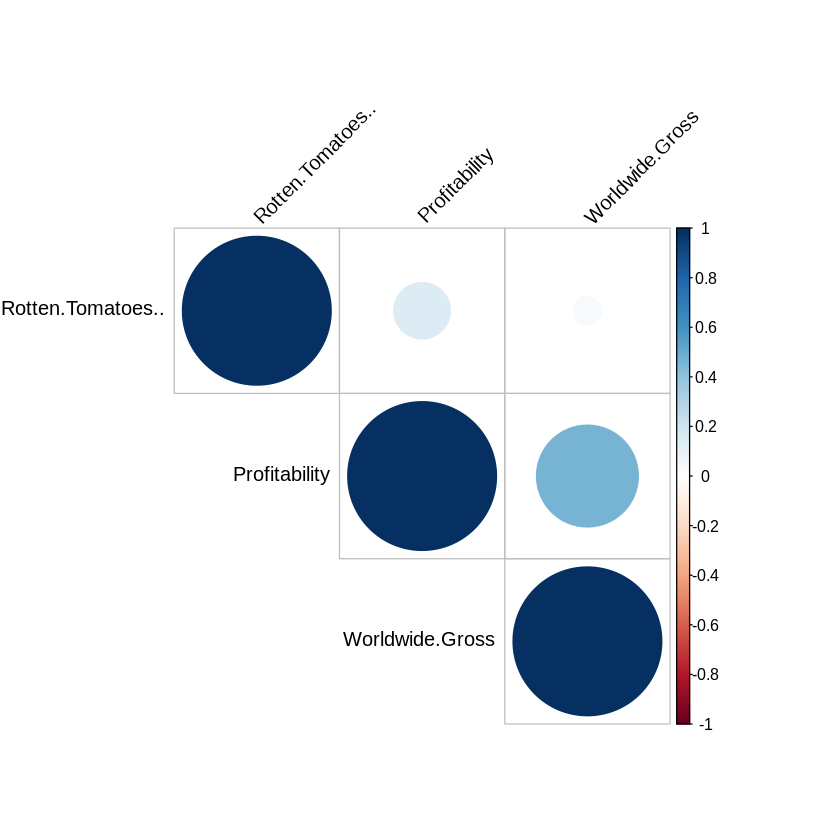

In [18]:
# ------------------------------
# CORRELATION ANALYSIS
# ------------------------------

# Correlation heatmap for numeric variables
numeric_cols <- df1 %>% select(Profitability, Worldwide.Gross, Rotten.Tomatoes..)  # Select numeric columns for correlation
cor_matrix <- cor(numeric_cols)  # Calculate correlation matrix

# Plotting the correlation matrix as a heatmap
install.packages("corrplot")  # If corrplot isn't installed yet
library(corrplot)
corrplot(cor_matrix, method = "circle", type = "upper", order = "hclust", tl.col = "black", tl.srt = 45)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



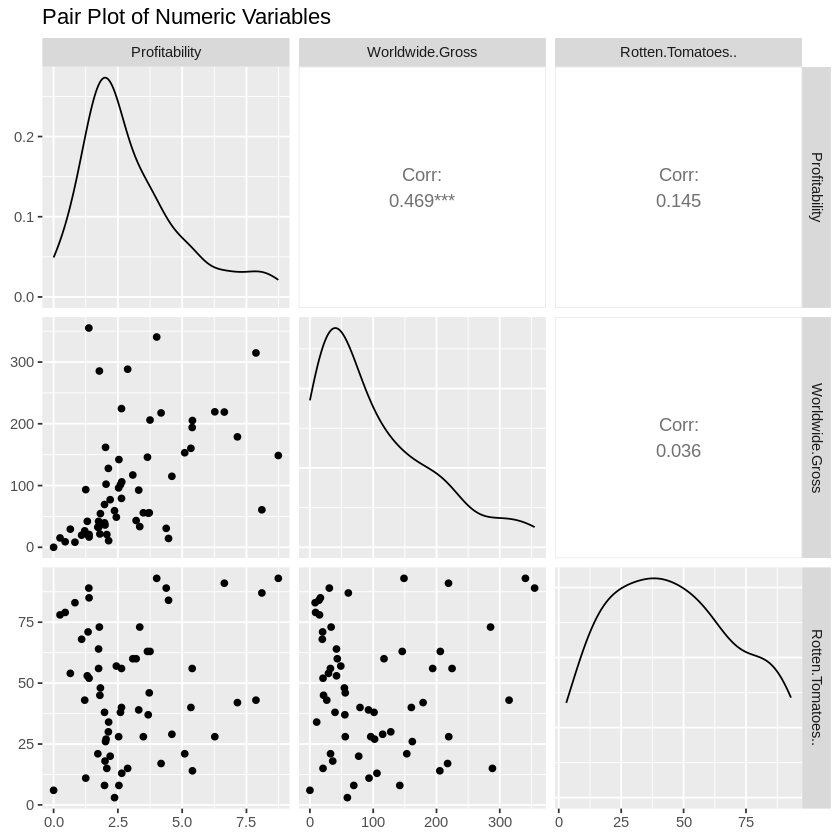

In [19]:
# ------------------------------
# ADVANCED VISUALIZATIONS
# ------------------------------

# Pair plot (scatterplot matrix) to visualize relationships between numerical variables
install.packages("GGally")  # If GGally isn't installed yet
library(GGally)
ggpairs(df1 %>% select(Profitability, Worldwide.Gross, Rotten.Tomatoes..),
        title = "Pair Plot of Numeric Variables")

In [21]:
# ------------------------------
# EXPORTING CLEANED DATA
# ------------------------------

# Export the cleaned dataset to a new CSV file for further analysis
write.csv(df1, "USA_Stories_Cleaned.csv")